# Gradient Descent: Step Sizes - Lab

## Introduction

In this lab, you'll practice applying gradient descent.  As you know, gradient descent begins with an initial regression line and moves to a "best fit" regression line by changing values of $m$ and $b$ and evaluating the RSS.  So far, we have illustrated this technique by changing the values of $m$ and evaluating the RSS.  In this lab, you will work through applying this technique by changing the value of $b$ instead.  Let's get started.

## Objectives

You will be able to:

- Use gradient descent to find the optimal parameters for a linear regression model
- Describe how to use an RSS curve to find the optimal parameters for a linear regression model

In [2]:
import sys
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import matplotlib.pyplot as plt

## Setting up Our Initial Regression Line

Once again, we'll take a look at revenues (our data example), which looks like this:

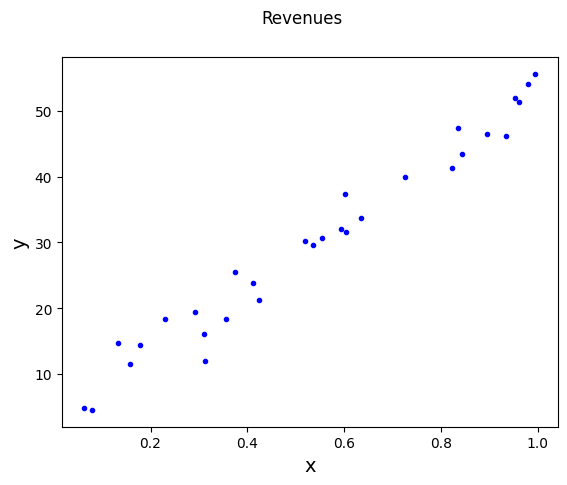

In [122]:
np.random.seed(225)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3 + 50*x + y_randterm

fig, ax = plt.subplots()
ax.scatter(x, y, marker=".", c="b")
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
fig.suptitle("Revenues");

We can start with some values for an initial not-so-accurate regression line, $y = 43x + 12$.

In [123]:
def regression_formula(x):
    return 43*x + 12

We plot this line with the same data below:

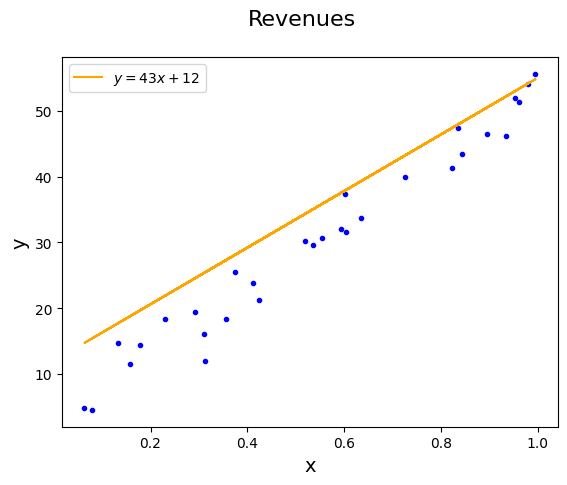

In [124]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker=".", c="b")
ax.plot(x, regression_formula(x), color="orange", label=r'$y = 43x + 12$')
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
fig.suptitle("Revenues", fontsize=16)
ax.legend();

As you can see, this line is near the data, but not quite right. Let's evaluate that more formally using RSS.

In [125]:
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return errors(x_values, y_values, m, b)**2

def residual_sum_squares(x_values, y_values, m, b):
    return sum(squared_errors(x_values, y_values, m, b))

Now using the `residual_sum_squares`, function, we calculate the RSS to measure the accuracy of the regression line to our data.  Let's take another look at that function:

In [126]:
residual_sum_squares(x, y , 43, 12)

1117.8454014417434

So, for a $b$ of 12, we are getting an RSS of 1117.8. Let's see if we can do better than that!

### Building a cost curve

Now let's use the `residual_sum_squares` function to build a cost curve.  Keeping the $m$ value fixed at $43$, write a function called `rss_values`.  
* `rss_values` passes our dataset with the `x_values` and `y_values` arguments.  
* It also takes a list of values of $b$, and an initial $m$ value as arguments.  
* It outputs a NumPy array with a first column of `b_values` and second column of `rss_values`. For example, this input:
  ```python
  rss_values(x, y, 43, [1, 2, 3])
  ```
  Should produce this output:
  ```python
  array([[1.000000, 1368.212664],
       [2.000000, 1045.452004],
       [3.000000, 782.691343]])
  ```
  Where 1, 2, and 3 are the b values an 1368.2, 1045.5 and 782.7 are the associated RSS values.
  
*Hint:* Check out `np.zeros` ([documentation here](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)).

In [128]:
# Replace None with appropriate code
def rss_values(x_values, y_values, m, b_values):
    
    # Make a NumPy array to contain the data
    results = []
    
    # Loop over all of the values in b_values
    for idx, b_val in enumerate(b_values):
        
        # Add the current b value and associated RSS to the
        # NumPy array
        rss = residual_sum_squares(x_values, y_values, m, b_val)
        results.append([b_val, rss])
        
    # Return the NumPy array
    return np.array(results)

In [129]:
# Run this cell without changes
example_rss = rss_values(x, y, 43, [1,2,3])

# Should return a NumPy array
assert type(example_rss) == np.ndarray

# Specifically a 2D array
assert example_rss.ndim == 2

# The shape should match the number of b values passed in
assert example_rss.shape == (3, 2)

example_rss

array([[1.000000, 1368.212664],
       [2.000000, 1045.452004],
       [3.000000, 782.691343]])

Now let's make more of an attempt to find the actual best b value for our `x` and `y` data.

Make an array `b_val` that contains values between 0 and 14 with steps of 0.5.

*Hint:* Check out `np.arange` ([documentation here](https://numpy.org/doc/stable/reference/generated/numpy.arange.html))

In [130]:
# Replace None with appropriate code
b_val = np.arange(0,14,0.5)
b_val

array([0.000000, 0.500000, 1.000000, 1.500000, 2.000000, 2.500000,
       3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000,
       6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000,
       9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000,
       12.000000, 12.500000, 13.000000, 13.500000])

Now use your `rss_values` function to find the RSS values for each value in `b_val`. Continue to use the m value of 43.

We have included code to print out the resulting table.

In [131]:
# Replace None with appropriate code
bval_rss = rss_values(x, y, 43, b_val)
np.savetxt(sys.stdout, bval_rss, '%16.2f') # this line is to round your result, which will make things look nicer.

            0.00          1750.97
            0.50          1552.09
            1.00          1368.21
            1.50          1199.33
            2.00          1045.45
            2.50           906.57
            3.00           782.69
            3.50           673.81
            4.00           579.93
            4.50           501.05
            5.00           437.17
            5.50           388.29
            6.00           354.41
            6.50           335.53
            7.00           331.65
            7.50           342.77
            8.00           368.89
            8.50           410.01
            9.00           466.13
            9.50           537.25
           10.00           623.37
           10.50           724.49
           11.00           840.61
           11.50           971.73
           12.00          1117.85
           12.50          1278.97
           13.00          1455.08
           13.50          1646.20


This represents our cost curve!

Let's plot this out using a a line chart.

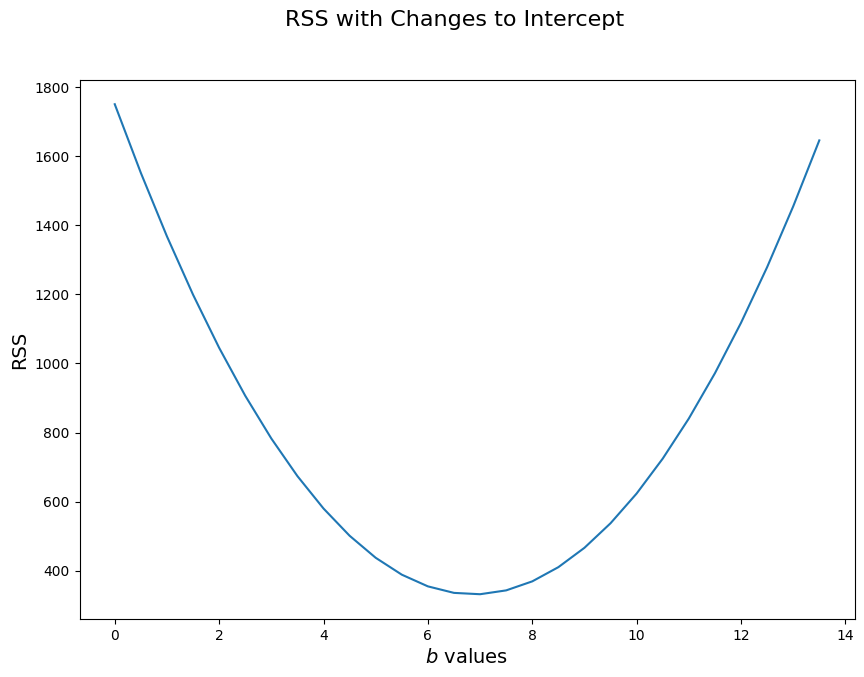

In [132]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(bval_rss[:,0], bval_rss[:,1])
ax.set_xlabel(r'$b$ values', fontsize=14)
ax.set_ylabel("RSS", fontsize=14)
fig.suptitle("RSS with Changes to Intercept", fontsize=16);

## Looking at the Slope of Our Cost Curve

In this section, we'll work up to building a gradient descent function that automatically changes our step size.  To get you started, we'll provide a function called `slope_at` that calculates the slope of the cost curve at a given point on the cost curve.

Use the `slope_at` function for b-values 3 and 6 (continuing to use an m of 43).

In [133]:
def slope_at(x_values, y_values, m, b):
    delta = .001
    base_rss = residual_sum_squares(x_values, y_values, m, b)
    delta_rss = residual_sum_squares(x_values, y_values, m, b + delta)
    numerator = delta_rss - base_rss
    slope = numerator/delta
    return slope

In [134]:
# Use slope_at for b value 3
slope_at(x, y, 43, 3)
# -232.73066022784406

-232.73066022784406

In [135]:
# Use slope_at for b value 6
slope_at(x, y, 43, 6)
# -52.73066022772355

-52.73066022772355

The `slope_at` function takes in our dataset, and returns the slope of the cost curve at that point.  So the numbers -232.73 and -52.73 reflect the slopes at the cost curve when b is 3 and 6 respectively.

Below, we plot these on the cost curve.

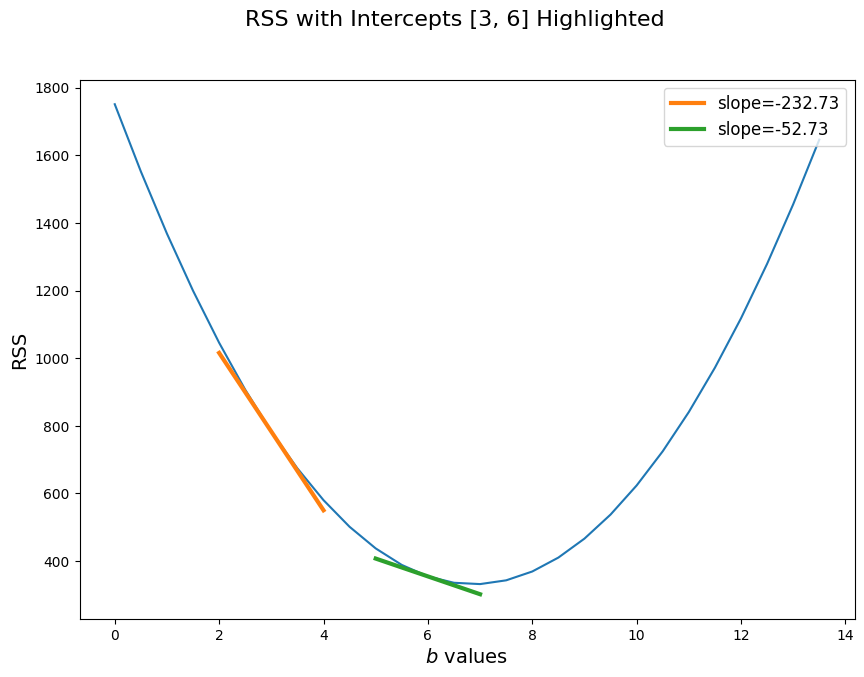

In [136]:
# Setting up to repeat the same process for 3 and 6
# (You can change these values to see other tangent lines)
b_vals = [3, 6]

def plot_slope_at_b_vals(x, y, m, b_vals, bval_rss):
    # Find the slope at each of these values
    slopes = [slope_at(x, y, m, b) for b in b_vals]
    # Find the RSS at each of these values
    rss_values = [residual_sum_squares(x, y, m, b) for b in b_vals]

    # Calculate the actual x and y locations for plotting
    x_values = [np.linspace(b-1, b+1, 100) for b in b_vals]
    y_values = [rss_values[i] + slopes[i]*(x_values[i] - b) for i, b in enumerate(b_vals)]
    
    # Plotting the same RSS curve as before
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(bval_rss[:,0], bval_rss[:,1])
    ax.set_xlabel(r'$b$ values', fontsize=14)
    ax.set_ylabel("RSS", fontsize=14)

    # Adding tangent lines for the selected b values
    for i in range(len(b_vals)):
        ax.plot(x_values[i], y_values[i], label=f"slope={round(slopes[i], 2)}", linewidth=3)

    ax.legend(loc='upper right', fontsize='large')
    fig.suptitle(f"RSS with Intercepts {[round(b, 3) for b in b_vals]} Highlighted", fontsize=16)
    
plot_slope_at_b_vals(x, y, 43, b_vals, bval_rss)

Let's look at the above graph.  When the curve is steeper and downwards at $b = 3$, the slope is around -232.73.  And at $b = 6$ with our cost curve becoming flatter, our slope is around -52.73. 

## Moving Towards Gradient Descent

Now that we are familiar with our `slope_at` function and how it calculates the slope of our cost curve at a given point, we can begin to use that function with our gradient descent procedure.

Remember that gradient descent works by starting at a regression line with values m, and b, which corresponds to a point on our cost curve.  Then we alter our m or b value (here, the b value) by looking to the slope of the cost curve at that point.  Then we look to the slope of the cost curve at the new b value to indicate the size and direction of the next step.

So now let's write a function called `updated_b`.  The function will tell us the step size and direction to move along our cost curve.  The `updated_b` function takes as arguments an initial value of $b$, a learning rate, and the `slope` of the cost curve at that value of $m$.  Its return value is the next value of `b` that it calculates.

In [156]:
def updated_b(initial_b, learning_rate, cost_curve_slope):
    step_size = learning_rate * cost_curve_slope
    if cost_curve_slope < 0:
        updated_b_value = initial_b - step_size 
    else:
        updated_b_value = initial_b + step_size
        
    return updated_b_value


Test out your function below. Each time we update `current_b` and step a little closer to the optimal value.

In [157]:
b_vals = []

current_b = 3
b_vals.append(current_b)

current_cost_slope = slope_at(x, y, 43, current_b)
new_b = updated_b(current_b, .01, current_cost_slope)
print(f"""
Current b: {round(current_b, 3)}
Cost slope for current b: {round(current_cost_slope, 3)}
Updated b: {round(new_b, 3)}
""")
# Current b: 3
# Cost slope for current b: -232.731
# Updated b: 5.327


Current b: 3
Cost slope for current b: -232.731
Updated b: 5.327



In [158]:
current_b = new_b
b_vals.append(current_b)

current_cost_slope = slope_at(x, y, 43, current_b)
new_b = updated_b(current_b, .01, current_cost_slope)
print(f"""
Current b: {round(current_b, 3)}
Cost slope for current b: {round(current_cost_slope, 3)}
Updated b: {round(new_b, 3)}
""")
# Current b: 5.327
# Cost slope for current b: -93.092
# Updated b: 6.258


Current b: 5.327
Cost slope for current b: -93.092
Updated b: 6.258



In [159]:
current_b = new_b
b_vals.append(current_b)

current_cost_slope = slope_at(x, y, 43, current_b)
new_b = updated_b(current_b, .01, current_cost_slope)
print(f"""
Current b: {round(current_b, 3)}
Cost slope for current b: {round(current_cost_slope, 3)}
Updated b: {round(new_b, 3)}
""")
# Current b: 6.258
# Cost slope for current b: -37.237
# Updated b: 6.631


Current b: 6.258
Cost slope for current b: -37.237
Updated b: 6.631



In [160]:
current_b = new_b
b_vals.append(current_b)

current_cost_slope = slope_at(x, y, 43, current_b)
new_b = updated_b(current_b, .01, current_cost_slope)
print(f"""
Current b: {round(current_b, 3)}
Cost slope for current b: {round(current_cost_slope, 3)}
Updated b: {round(new_b, 3)}
""")
# Current b: 6.631
# Cost slope for current b: -14.895
# Updated b: 6.78


Current b: 6.631
Cost slope for current b: -14.895
Updated b: 6.78



Take a careful look at how we use the `updated_b` function.  By using our updated value of $b$ we are quickly converging towards an optimal value of $b$.

In the cell below, we plot each of these b values and their associated cost curve slopes. Note how the tangent lines get closer together as the steps approach the minimum.

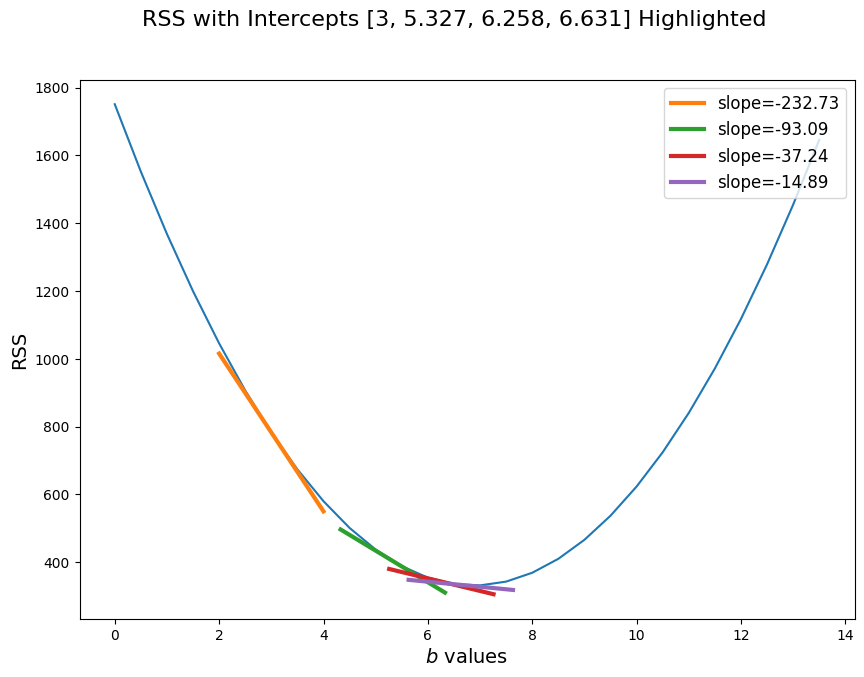

In [161]:
plot_slope_at_b_vals(x, y, 43, b_vals, bval_rss)

We can visualize the actual lines created by those b values against the data like this:

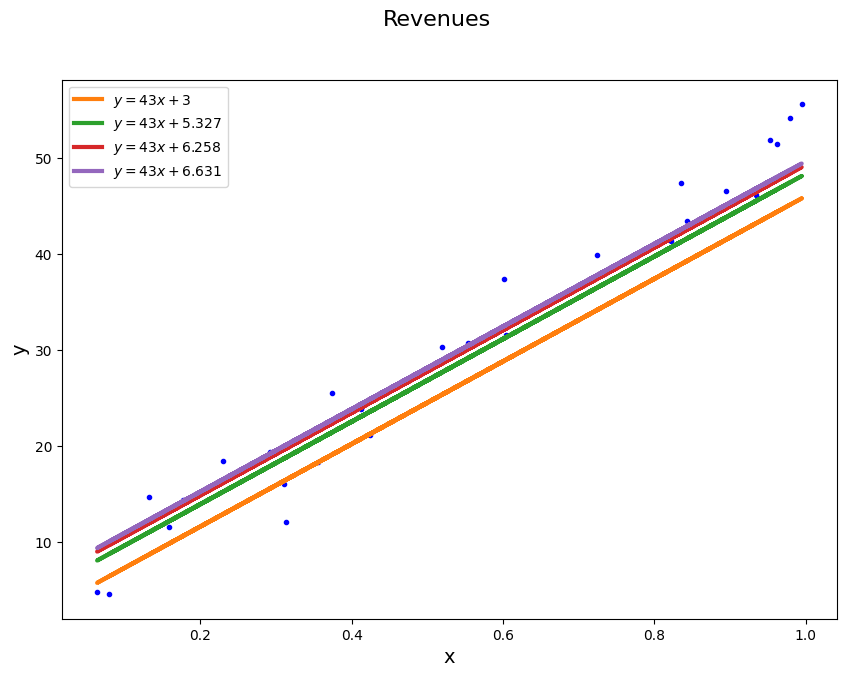

In [162]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(x, y, marker=".", c="b")
colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, b in enumerate(b_vals):
    ax.plot(x, x*43 + b, color=colors[i], label=f'$y = 43x + {round(b, 3)}$', linewidth=3)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
fig.suptitle("Revenues", fontsize=16)
ax.legend();

Now let's write another function called `gradient_descent`.  The inputs of the function are `x_values`, `y_values`, `steps`, the `m` we are holding constant, the `learning_rate`, and the `current_b` that we are looking at.  The `steps` arguments represent the number of steps the function will take before the function stops.  We can get a sense of the return value in the cell below.  It is a list of dictionaries, with each dictionary having a key of the current `b` value, the `slope` of the cost curve at that `b` value, and the `rss` at that `b` value.

In [178]:
def gradient_descent(x_values, y_values, steps, current_b, learning_rate, m):
    result = []
    for step in range(steps):
        slope = slope_at(x_values, y_values, m, current_b)
        rss = residual_sum_squares(x_values, y_values, m, current_b)
        result.append({'b': current_b, 'slope': slope, 'rss': rss})
        current_b = updated_b(current_b, learning_rate, slope)
        
    return result

In [179]:
import pprint
descent_steps = gradient_descent(x, y, 15, 0, learning_rate = .005, m = 43)
pprint.pprint(descent_steps)

#[{'b': 0, 'rss': 1750.97, 'slope': -412.73},
# {'b': 2.063653301142949, 'rss': 1026.94, 'slope': -288.91},
# {'b': 3.5082106119386935, 'rss': 672.15, 'slope': -202.24},
# {'b': 4.519400729495828, 'rss': 498.29, 'slope': -141.57},
# {'b': 5.2272338117862205, 'rss': 413.1, 'slope': -99.1},
# {'b': 5.72271696938941, 'rss': 371.35, 'slope': -69.37},
# {'b': 6.06955517971187, 'rss': 350.88, 'slope': -48.56},
# {'b': 6.312341926937677, 'rss': 340.86, 'slope': -33.99},
# {'b': 6.482292649996282, 'rss': 335.94, 'slope': -23.79},
# {'b': 6.601258156136964, 'rss': 333.53, 'slope': -16.66},
# {'b': 6.684534010435641, 'rss': 332.35, 'slope': -11.66},
# {'b': 6.742827108444089, 'rss': 331.77, 'slope': -8.16},
# {'b': 6.7836322770506285, 'rss': 331.49, 'slope': -5.71},
# {'b': 6.812195895074922, 'rss': 331.35, 'slope': -4.0},
# {'b': 6.832190427692808, 'rss': 331.28, 'slope': -2.8}]

[{'b': 0, 'rss': 1750.9733241783329, 'slope': -412.73066022858984},
 {'b': 2.063653301142949,
  'rss': 1026.9383735363217,
  'slope': -288.91146215914887},
 {'b': 3.5082106119386935,
  'rss': 672.1482467070473,
  'slope': -202.23802351142695},
 {'b': 4.519400729495828,
  'rss': 498.29198384953065,
  'slope': -141.56661645807844},
 {'b': 5.2272338117862205,
  'rss': 413.0960445515036,
  'slope': -99.09663152063786},
 {'b': 5.72271696938941,
  'rss': 371.34557494702494,
  'slope': -69.36764206449197},
 {'b': 6.06955517971187,
  'rss': 350.8847232969017,
  'slope': -48.557349445161435},
 {'b': 6.312341926937677,
  'rss': 340.8567209075995,
  'slope': -33.99014461172101},
 {'b': 6.482292649996282,
  'rss': 335.94147018031197,
  'slope': -23.793101228136493},
 {'b': 6.601258156136964,
  'rss': 333.5319266343892,
  'slope': -16.655170859735335},
 {'b': 6.684534010435641,
  'rss': 332.35050081419246,
  'slope': -11.65861960168968},
 {'b': 6.742827108444089,
  'rss': 331.7710775244176,
  'slop

Looking at our b-values, you get a pretty good idea of how our gradient descent function works.  It starts far away with $b = 0$, and the step size is relatively large, as is the slope of the cost curve.  As the $b$ value updates such that it approaches a minimum of the RSS, the slope of the cost curve and the size of each step both decrease.

Compared to the initial RSS of 1117.8 when $b$ was 12, we are down to 331.3!

Remember that each of these steps indicates a change in our regression line's slope value towards a "fit" that more accurately matches our dataset.  Let's plot the final regression line as found before, with $m=43$ and $b=6.83$

In [ ]:
# plot the final result here

As you can see, this final intercept value of around $b=6.8$ matches our data much better than the previous guess of 12. Remember that the slope was kept constant. You can see that lifting the slope upwards could probably even lead to a better fit!

## Summary

In this lesson, we learned some more about gradient descent.  We saw how gradient descent allows our function to improve to a regression line that better matches our data.  We see how to change our regression line, by looking at the Residual Sum of Squares related to the current regression line. We update our regression line by looking at the rate of change of our RSS as we adjust our regression line in the right direction -- that is, the slope of our cost curve.  The larger the magnitude of our rate of change (or slope of our cost curve) the larger our step size.  This way, we take larger steps the further away we are from our minimizing our RSS, and take smaller steps as we converge towards our minimum RSS. 